In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/text classification/bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [ ]:
data_len = len(df)
train_data = int(data_len*0.8) 
print(train_data)
test_data = data_len - train_data
print(test_data)
data_len

1780
445


2225

In [ ]:
train_tag = df['category'][:train_data]
train_post = df['text'][:train_data]

test_tag = df['category'][train_data:]
test_post = df['text'][train_data:]

In [ ]:
import numpy as np
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer


In [ ]:
num_labels = 5       # categories haru mathi herera
vocab_size = 1500    # (1 sec)ekchoti ma kati ota text data lai vector ko format ma pathauney
                     # news ma kati words cha tesma depend garcha 
                     # i.e 0 ma tech category ma kati words cha tah
### vocab_size ---> euta category ko news ma number of words kati cha bhanne?
batch_size = 100
# mathi ko data haru guess garera rakhne ho pachi tuning garera milauna sakincha


### define Tokenizer with vocab size  ###
# kun word chai kun class sanga related cha bhanne
# i.e bank ma jada line milauna token diyeko jasto
# NN ley queue lai manage garna token use garcha

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_post)

x_train = tokenizer.texts_to_matrix(train_post,mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_post,mode ='tfidf')

encoder = LabelBinarizer()
encoder.fit(train_tag)

y_train = encoder.transform(train_tag)
y_test = encoder.transform(test_tag)



In [ ]:
model = Sequential()
model.add(Dense(512,input_shape = (vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               768512    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [ ]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 10,validation_split = 0.1)

Epoch 1/10
51/51 [==============================] - 1s 9ms/step - loss: 0.8639 - accuracy: 0.6607 - val_loss: 0.0670 - val_accuracy: 0.9831
Epoch 2/10
51/51 [==============================] - 0s 7ms/step - loss: 0.0436 - accuracy: 0.9887 - val_loss: 0.1024 - val_accuracy: 0.9607
Epoch 3/10
51/51 [==============================] - 0s 7ms/step - loss: 0.0137 - accuracy: 0.9979 - val_loss: 0.0898 - val_accuracy: 0.9719
Epoch 4/10
51/51 [==============================] - 0s 7ms/step - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.1198 - val_accuracy: 0.9607
Epoch 5/10
51/51 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.1123 - val_accuracy: 0.9607
Epoch 6/10
51/51 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.1371 - val_accuracy: 0.9719
Epoch 7/10
51/51 [==============================] - 0s 6ms/step - loss: 0.0118 - accuracy: 0.9959 - val_loss: 0.1300 - val_accuracy: 0.9607
Epoch 8/10
51/51 [==

In [ ]:
# saving the model

import pickle
model.save('/content/drive/MyDrive/text classification/bbc_text.h5')
with open('tokenizer.pickle','wb') as f:
  pickle.dump(tokenizer,f,protocol = pickle.HIGHEST_PROTOCOL)
# pickle chai serialization ko lagi chahincha

In [ ]:
# loading the model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/text classification/bbc_text.h5')

# tokenizer = Tokenizer()
# aba read mode ma kholne
# model testing ko lagi
with open('tokenizer.pickle','rb') as f:
  tokenizers = pickle.load(f)


In [ ]:
encoder.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype='<U13')

In [ ]:
labels = np.array(['business', 'entertainment', 'politics', 'sport', 'tech'])

In [ ]:
test_files = ['/content/drive/MyDrive/text classification/bbc.txt']

In [ ]:
from pathlib import Path
import pandas as pd
x_data = []
for text_file in test_files:
  text_file_data = Path(text_file).read_text()
  x_data.append(text_file_data)

x_data_series = pd.Series(x_data)
#x_data_series
# yesma queue ma huncha ra teslai tokenize garnu parcha

x_tokenized = tokenizer.texts_to_matrix(x_data_series, mode = 'tfidf')
x_tokenized

array([[0.        , 2.21524948, 1.65808525, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# for prediction
for x_t in x_tokenized:
  prediction = model.predict(np.array([x_t]))
  print(prediction)
  #prediction gareko value ko index identify garna
  
  predicted_label = np.argmax(prediction)
  print(predicted_label)

  # prediction gareko value ko label patta lagauna
  predicted_label = labels[np.argmax(prediction)]
  print(predicted_label)

[[9.9760997e-01 1.9164478e-04 4.2836383e-04 2.1231319e-04 1.5577349e-03]]
0
business


In [ ]:
# for notebook only 
'''
b = open('/content/drive/MyDrive/text classification/news.txt','w')
news = "The New York Stock Exchange has reversed its decision to kick out three of China's largest state-owned telecom companies.The exchange said late Monday that it no longer intends to delist the firms after and that they will continue to be listed and traded on the NYSE.The sudden about-face comes just days after the NYSE announced that it would end trading in the shares of China Mobile (CHL), China Telecom (CHA), and China Unicom (CHU) — a move it said was needed to comply with an order President Donald Trump signed late last year that bans Americans from investing in firms that the US government suspects are either owned or controlled by the Chinese military."
b.write(news)
b.close()

test_files = ['news.txt']

from pathlib import Path
x_data = []
for text_file in test_files:
  text_file_data = Path(text_file).read_text()
  x_data.append(text_file_data)

x_data_series = pd.Series(x_data)
x_data_series 
'''

'\nb = open(\'/content/drive/MyDrive/text classification/news.txt\',\'w\')\nnews = "The New York Stock Exchange has reversed its decision to kick out three of China\'s largest state-owned telecom companies.The exchange said late Monday that it no longer intends to delist the firms after and that they will continue to be listed and traded on the NYSE.The sudden about-face comes just days after the NYSE announced that it would end trading in the shares of China Mobile (CHL), China Telecom (CHA), and China Unicom (CHU) — a move it said was needed to comply with an order President Donald Trump signed late last year that bans Americans from investing in firms that the US government suspects are either owned or controlled by the Chinese military."\nb.write(news)\nb.close()\n\ntest_files = [\'news.txt\']\n\nfrom pathlib import Path\nx_data = []\nfor text_file in test_files:\n  text_file_data = Path(text_file).read_text()\n  x_data.append(text_file_data)\n\nx_data_series = pd.Series(x_data)\nx

{'loss': [0.4708902835845947, 0.0532623790204525, 0.01172805204987526, 0.011553328484296799, 0.005426368210464716, 0.0135145653039217, 0.005504544824361801, 0.0015116538852453232, 0.0005254645948298275, 0.000889213290065527], 'accuracy': [0.8320848941802979, 0.9868913888931274, 0.9987515807151794, 0.9981273412704468, 0.9987515807151794, 0.9956304430961609, 0.9981273412704468, 0.9993757605552673, 1.0, 1.0], 'val_loss': [0.06696467101573944, 0.10243863612413406, 0.08976784348487854, 0.11980926990509033, 0.11227703839540482, 0.13707000017166138, 0.12999184429645538, 0.12329916656017303, 0.11753299832344055, 0.11033008992671967], 'val_accuracy': [0.983146071434021, 0.9606741666793823, 0.9719101190567017, 0.9606741666793823, 0.9606741666793823, 0.9719101190567017, 0.9606741666793823, 0.9606741666793823, 0.9606741666793823, 0.966292142868042]}


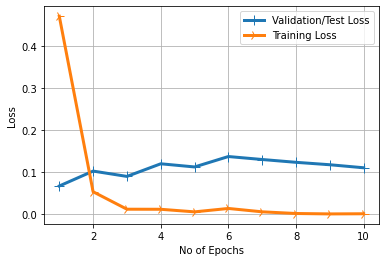

In [ ]:
# Loss Plot
# Plot of training loss VS validation Loss
import matplotlib.pyplot as plt

history_dict= history.history
print(history_dict)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = [1,2,3,4,5,6,7,8,9,10]
line1 = plt.plot(epochs,val_loss_values,label = 'Validation/Test Loss')
line2 = plt.plot(epochs,loss_values,label = 'Training Loss')

plt.setp(line1,linewidth = 3.0,marker = '+',markersize = 10.0)
plt.setp(line2,linewidth = 3.0,marker ='4',markersize = 10.0)

plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

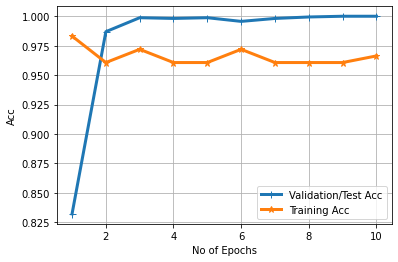

In [ ]:
# accuracy plot
# Plot of training acc VS validation acc
import matplotlib.pyplot as plt

history_dict= history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
line1 = plt.plot(epochs,acc_values,label = 'Validation/Test Acc')
line2 = plt.plot(epochs,val_acc_values,label = 'Training Acc')

plt.setp(line1,linewidth = 3,marker = '+',markersize = 7)
plt.setp(line2,linewidth = 3,marker = '*',markersize = 7)

plt.xlabel('No of Epochs')
plt.ylabel('Acc')
plt.grid(True)
plt.legend()
plt.show()